In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('gurgaon_properties_outlier_treated.csv')

In [4]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,bestech altura,sector 79,1.85,8605.0,2150.0,Super Built up area 2150(199.74 sq.m.),3,4,3+,11.0,North,New Property,2150.0,NaN,NaN,0,1,0,0,0,0,49
1,flat,rof ananda,sector 95,0.46,6319.0,728.0,Carpet area: 728 (67.63 sq.m.),2,2,2,11.0,North-West,New Property,NaN,NaN,728.0,1,0,0,0,0,0,82
2,flat,umang monsoon breeze,sector 78,0.95,5491.0,1730.0,Built Up area: 1730 (160.72 sq.m.),3,3,2,9.0,East,Relatively New,NaN,1730.0,NaN,0,0,0,0,0,1,65
3,flat,tata primanti,sector 72,4.00,13769.0,2905.0,Super Built up area 2905(269.88 sq.m.),4,5,2,7.0,South-East,Moderately Old,2905.0,NaN,NaN,0,1,0,0,0,0,38
4,house,emaar mgf marbella,sector 66,9.00,21251.0,4235.0,Plot area 5605(520.72 sq.m.)Built Up area: 520...,4,4,3+,NaN,South-West,Relatively New,NaN,5200.0,4235.0,0,1,1,1,0,1,114


In [5]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1027
agePossession             0
super_built_up_area    1717
built_up_area          1978
carpet_area            1737
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
dtype: int64

### Built up area

<Axes: xlabel='built_up_area', ylabel='super_built_up_area'>

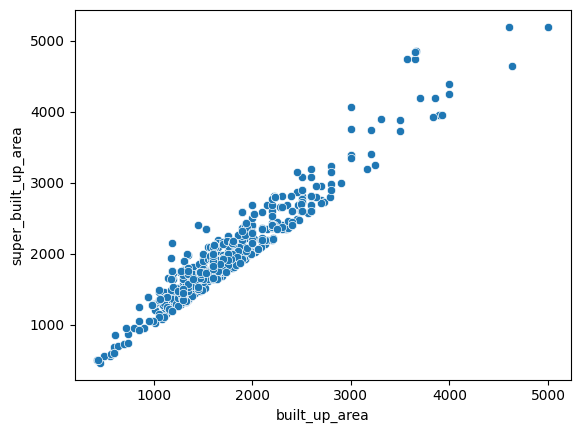

In [6]:
sns.scatterplot(x = df['built_up_area'],y = df['super_built_up_area'],data = df)

<Axes: xlabel='built_up_area', ylabel='carpet_area'>

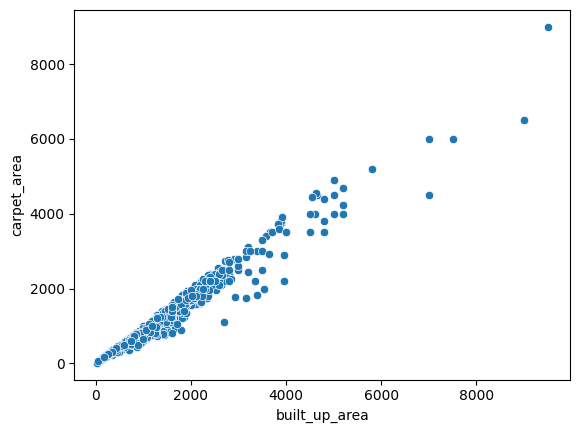

In [7]:
sns.scatterplot(x = df['built_up_area'],y = df['carpet_area'],data = df)

In [8]:
((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))

0       False
1       False
2       False
3       False
4       False
        ...  
3584    False
3585    False
3586    False
3587    False
3588    False
Length: 3589, dtype: bool

In [9]:
all_present_df = df[~((df['super_built_up_area'].isnull()) | (df['built_up_area'].isnull()) | (df['carpet_area'].isnull()))]

In [10]:
all_present_df.shape

(529, 23)

In [11]:
super_to_built_up_ratio = (all_present_df['super_built_up_area']/all_present_df['built_up_area']).median()

In [12]:
carpet_to_built_up_ratio = (all_present_df['carpet_area']/all_present_df['built_up_area']).median()

In [13]:
print(super_to_built_up_ratio, carpet_to_built_up_ratio)

1.1075 0.9


In [14]:
# both present built up null
sbc_df = df[~(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & ~(df['carpet_area'].isnull())]

In [15]:
sbc_df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
15,flat,dlf the ultima,sector 81,2.35,11233.0,2092.0,Super Built up area 2092(194.35 sq.m.)Carpet a...,3,4,3+,18.0,North,Relatively New,2092.0,NaN,1100.00,0,1,0,0,0,0,106
23,flat,puri emerald bay,sector 104,2.65,15006.0,1766.0,Super Built up area 2450(227.61 sq.m.)Carpet a...,3,4,3,15.0,North-East,Relatively New,2450.0,NaN,1765.73,0,1,0,0,0,1,174
28,flat,mapsko mount ville,sector 79,1.20,8054.0,1490.0,Super Built up area 1490(138.43 sq.m.)Carpet a...,3,3,3,9.0,South,Relatively New,1490.0,NaN,1163.91,1,0,0,0,0,1,104
36,flat,signature global solera,sector 107,0.40,6645.0,602.0,Super Built up area 602(55.93 sq.m.)Carpet are...,2,2,1,7.0,NaN,Relatively New,602.0,NaN,548.00,0,0,0,0,0,1,55
56,flat,imperia the esfera,sector 37c,1.40,5385.0,2600.0,Super Built up area 2600(241.55 sq.m.)Carpet a...,4,5,3,9.0,North,Relatively New,2600.0,NaN,2100.00,1,1,0,1,1,0,49


In [16]:
sbc_df['built_up_area'].fillna(round(((sbc_df['super_built_up_area']/1.105) + (sbc_df['carpet_area']/0.9))/2),inplace=True)

In [17]:
df.update(sbc_df)

In [18]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1027
agePossession             0
super_built_up_area    1717
built_up_area          1557
carpet_area            1737
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
dtype: int64

In [19]:
# sb present c is null built up null
sb_df = df[~(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull())]

In [20]:
sb_df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,bestech altura,sector 79,1.85,8605.0,2150.0,Super Built up area 2150(199.74 sq.m.),3,4,3+,11.0,North,New Property,2150.0,NaN,NaN,0,1,0,0,0,0,49
3,flat,tata primanti,sector 72,4.00,13769.0,2905.0,Super Built up area 2905(269.88 sq.m.),4,5,2,7.0,South-East,Moderately Old,2905.0,NaN,NaN,0,1,0,0,0,0,38
5,flat,bestech park view residency,sector 2,1.02,7208.0,1415.0,Super Built up area 1415(131.46 sq.m.),2,2,3,11.0,South-West,Moderately Old,1415.0,NaN,NaN,0,0,0,0,0,0,92
7,flat,indiabulls enigma,sector 110,3.45,10147.0,3400.0,Super Built up area 3400(315.87 sq.m.),4,4,3,9.0,North,Moderately Old,3400.0,NaN,NaN,0,1,0,0,0,1,125
17,flat,sunischit apartments,sector 54,1.69,7953.0,2125.0,Super Built up area 2200(204.39 sq.m.),3,3,3+,5.0,North,Old Property,2200.0,NaN,NaN,0,1,0,0,0,1,65


In [21]:
sb_df['built_up_area'].fillna(round(sb_df['super_built_up_area']/1.105),inplace=True)

In [22]:
df.update(sb_df)

In [23]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1027
agePossession             0
super_built_up_area    1717
built_up_area           683
carpet_area            1737
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
dtype: int64

In [24]:
# sb null c is present built up null
c_df = df[(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & ~(df['carpet_area'].isnull())]

In [25]:
c_df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
1,flat,rof ananda,sector 95,0.46,6319.0,728.0,Carpet area: 728 (67.63 sq.m.),2,2,2,11.0,North-West,New Property,NaN,NaN,728.0,1,0,0,0,0,0,82
10,flat,511 sarahah tower,sector 12,0.60,8333.0,720.0,Carpet area: 720 (66.89 sq.m.),2,2,1,0.0,NaN,New Property,NaN,NaN,720.0,0,0,0,1,0,2,0
11,flat,dlf belvedere towers,sector 25,3.40,13765.0,2470.0,Carpet area: 2470 (229.47 sq.m.),4,4,3,1.0,South-East,Old Property,NaN,NaN,2470.0,0,1,0,0,0,0,26
12,flat,signature global synera,sector 81,0.50,7886.0,634.0,Carpet area: 634 (58.9 sq.m.),2,2,1,11.0,East,New Property,NaN,NaN,634.0,0,0,0,0,0,2,97
13,flat,smart world gems,sector 89,1.20,8433.0,1423.0,Carpet area: 1423 (132.2 sq.m.),3,3,2,2.0,North-East,New Property,NaN,NaN,1423.0,0,0,0,0,0,0,44


In [26]:
c_df['built_up_area'].fillna(round(c_df['carpet_area']/0.9),inplace=True)

In [27]:
df.update(c_df)

In [28]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1027
agePossession             0
super_built_up_area    1717
built_up_area             0
carpet_area            1737
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
dtype: int64

<Axes: xlabel='built_up_area', ylabel='price'>

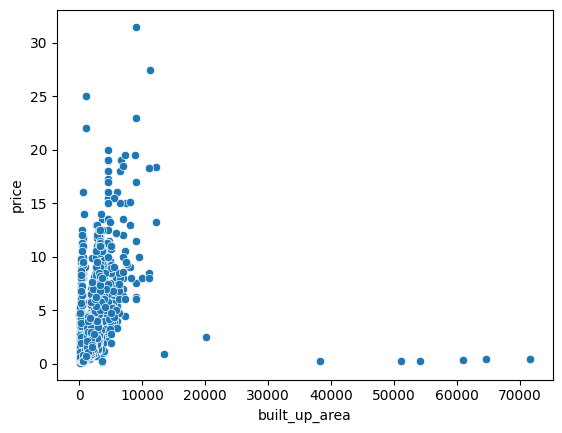

In [29]:
sns.scatterplot(x = df['built_up_area'],y = df['price'],data = df)

In [30]:
anamoly_df = df[(df['built_up_area'] < 2000) & (df['price'] > 2.5)][['price','area','built_up_area']]

In [31]:
anamoly_df.sample(5)

,price,area,built_up_area
1919,2.55,1935.0,215.0
382,3.00,1642.0,1642.0
3402,3.15,1548.0,1548.0
2468,3.65,1557.0,1557.0
516,8.50,4518.0,500.0


In [32]:
anamoly_df['built_up_area'] = anamoly_df['area']

In [33]:
df.update(anamoly_df)

<Axes: xlabel='built_up_area', ylabel='price'>

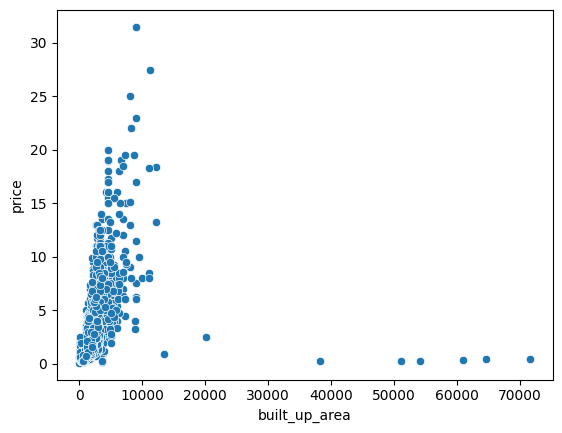

In [34]:
sns.scatterplot(x = df['built_up_area'],y = df['price'],data = df)

In [35]:
df.columns

Index(['property_type', 'society', 'sector', 'price', 'price_per_sqft', 'area',
       'areaWithType', 'bedRoom', 'bathroom', 'balcony', 'floorNum', 'facing',
       'agePossession', 'super_built_up_area', 'built_up_area', 'carpet_area',
       'study room', 'servant room', 'store room', 'pooja room', 'others',
       'furnishing_type', 'luxury_score'],
      dtype='object')

In [36]:
df.drop(columns=['area','areaWithType','super_built_up_area','carpet_area'],inplace=True)

In [37]:
df.head()

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,facing,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,bestech altura,sector 79,1.85,8605.0,3,4,3+,11.0,North,New Property,1946.0,0,1,0,0,0,0,49
1,flat,rof ananda,sector 95,0.46,6319.0,2,2,2,11.0,North-West,New Property,809.0,1,0,0,0,0,0,82
2,flat,umang monsoon breeze,sector 78,0.95,5491.0,3,3,2,9.0,East,Relatively New,1730.0,0,0,0,0,0,1,65
3,flat,tata primanti,sector 72,4.00,13769.0,4,5,2,7.0,South-East,Moderately Old,2629.0,0,1,0,0,0,0,38
4,house,emaar mgf marbella,sector 66,9.00,21251.0,4,4,3+,NaN,South-West,Relatively New,5200.0,0,1,1,1,0,1,114


In [38]:
df.isnull().sum()

property_type         0
society               1
sector                0
price                 0
price_per_sqft        0
bedRoom               0
bathroom              0
balcony               0
floorNum             17
facing             1027
agePossession         0
built_up_area         0
study room            0
servant room          0
store room            0
pooja room            0
others                0
furnishing_type       0
luxury_score          0
dtype: int64

### floorNum

In [39]:
df[df['floorNum'].isnull()]

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,facing,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
4,house,emaar mgf marbella,sector 66,9.00,21251.0,4,4,3+,NaN,South-West,Relatively New,5200.0,0,1,1,1,0,1,114
334,house,independent,sector 24,1.45,2984.0,3,3,1,NaN,NaN,Old Property,540.0,0,0,0,0,0,0,9
422,flat,NaN,sector 78,0.60,3692.0,2,2,0,NaN,NaN,Under Construction,1625.0,0,0,0,0,0,0,0
668,house,independent,sector 25,13.00,45710.0,6,8,3+,NaN,NaN,Relatively New,2844.0,1,1,1,1,0,2,0
673,house,independent,sector 7,6.50,15046.0,3,2,3+,NaN,NaN,Old Property,4320.0,0,0,0,0,0,0,9
1687,house,independent,sector 2,5.60,17284.0,8,6,3+,NaN,South-West,Moderately Old,3240.0,1,1,1,1,0,0,0
1700,house,independent,sector 26,4.60,12198.0,4,4,3+,NaN,NaN,Old Property,3771.0,0,0,0,0,0,0,28
1758,flat,experion heartsong,dwarka expressway,1.08,6150.0,3,3,0,NaN,NaN,Under Construction,1758.0,0,0,0,0,0,0,0
1824,house,independent,sector 4,0.65,11111.0,4,2,2,NaN,NaN,Moderately Old,585.0,0,0,0,0,0,0,0
1838,house,jacob pura,sector 12,0.35,9722.0,2,1,0,NaN,NaN,Old Property,360.0,0,0,0,0,0,0,0


In [40]:
df[df['property_type'] == 'house']['floorNum'].median()

2.0

In [41]:
df['floorNum'].fillna(2.0,inplace=True)

In [42]:
df.isnull().sum()

property_type         0
society               1
sector                0
price                 0
price_per_sqft        0
bedRoom               0
bathroom              0
balcony               0
floorNum              0
facing             1027
agePossession         0
built_up_area         0
study room            0
servant room          0
store room            0
pooja room            0
others                0
furnishing_type       0
luxury_score          0
dtype: int64

In [43]:
1011/df.shape[0]

0.28169406519921986

### facing

<Axes: ylabel='count'>

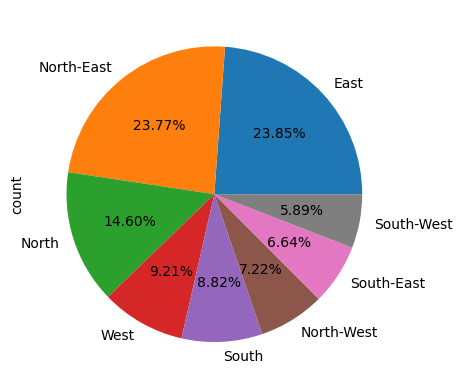

In [44]:
df['facing'].value_counts().plot(kind='pie',autopct='%0.2f%%')

In [45]:
df.drop(columns=['facing'],inplace=True)

In [46]:
df.sample(5)

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
1704,flat,bptp terra,sector 37d,1.95,14444.0,4,3,3,7.0,Under Construction,1650.0,0,0,0,0,0,0,53
3445,house,saksham welfare association,sector 22,4.70,19848.0,6,6,3+,2.0,Old Property,2368.0,0,0,1,1,0,1,106
932,flat,capital residences 360,sector 70a,1.10,7586.0,2,2,2,10.0,Relatively New,1312.0,1,0,0,0,0,0,42
835,flat,signature global solera,sector 107,0.25,7862.0,1,1,0,0.0,Undefined,318.0,0,0,0,0,0,0,55
1974,flat,signature global park,sohna road,0.70,6071.0,3,3,3,2.0,Relatively New,1281.0,0,0,0,1,0,0,152


In [47]:
df.isnull().sum()

property_type      0
society            1
sector             0
price              0
price_per_sqft     0
bedRoom            0
bathroom           0
balcony            0
floorNum           0
agePossession      0
built_up_area      0
study room         0
servant room       0
store room         0
pooja room         0
others             0
furnishing_type    0
luxury_score       0
dtype: int64

In [48]:
df.drop(index=[2536],inplace=True)

In [49]:
df.isnull().sum()

property_type      0
society            1
sector             0
price              0
price_per_sqft     0
bedRoom            0
bathroom           0
balcony            0
floorNum           0
agePossession      0
built_up_area      0
study room         0
servant room       0
store room         0
pooja room         0
others             0
furnishing_type    0
luxury_score       0
dtype: int64

### agePossession

In [50]:
df['agePossession'].value_counts()

agePossession
Relatively New        1611
New Property           563
Moderately Old         551
Undefined              300
Old Property           297
Under Construction     266
Name: count, dtype: int64

In [51]:
df[df['agePossession'] == 'Undefined']

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
9,flat,smart world gems,sector 89,1.10,9973.0,3,1,0,0.0,Undefined,1103.0,0,0,0,0,0,0,45
14,house,independent,sector 5,3.75,11029.0,5,5,3+,3.0,Undefined,3400.0,0,0,0,0,0,0,0
24,flat,godrej air,sector 85,1.40,10000.0,2,2,3,23.0,Undefined,1400.0,0,0,0,0,0,0,44
25,house,independent,sector 2,0.98,9074.0,9,4,3,1.0,Undefined,133.0,0,0,0,0,0,0,0
26,flat,supertech new soft launch,sector 68,0.84,7119.0,2,2,2,7.0,Undefined,1180.0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3506,flat,satya element one,sector 49,0.80,11111.0,1,1,1,0.0,Undefined,720.0,0,0,0,0,0,0,0
3518,flat,raheja sampada,sector 92,0.70,4453.0,3,3,0,7.0,Undefined,1572.0,0,0,0,0,0,0,0
3521,flat,kibithu villas,sector 48,3.45,12778.0,4,4,3+,2.0,Undefined,3000.0,0,0,0,0,0,0,0
3543,flat,emaar palm gardens,sector 83,1.80,9474.0,3,4,0,9.0,Undefined,1900.0,0,0,0,0,0,0,55


In [52]:
def mode_based_imputation(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['sector'] == row['sector']) & (df['property_type'] == row['property_type'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0] 
        else:
            return np.nan
    else:
        return row['agePossession']

In [53]:
df['agePossession'] = df.apply(mode_based_imputation,axis=1)

In [54]:
df['agePossession'].value_counts()

agePossession
Relatively New        1728
Moderately Old         600
New Property           592
Old Property           331
Under Construction     280
Undefined               57
Name: count, dtype: int64

In [55]:
def mode_based_imputation2(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['sector'] == row['sector'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0] 
        else:
            return np.nan
    else:
        return row['agePossession']

In [56]:
df['agePossession'] = df.apply(mode_based_imputation2,axis=1)

In [57]:
df['agePossession'].value_counts()

agePossession
Relatively New        1743
Moderately Old         603
New Property           593
Old Property           334
Under Construction     280
Undefined               35
Name: count, dtype: int64

In [58]:
def mode_based_imputation3(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['property_type'] == row['property_type'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0] 
        else:
            return np.nan
    else:
        return row['agePossession']

In [59]:
df['agePossession'] = df.apply(mode_based_imputation3,axis=1)

In [60]:
df['agePossession'].value_counts()

agePossession
Relatively New        1745
Moderately Old         636
New Property           593
Old Property           334
Under Construction     280
Name: count, dtype: int64

In [61]:
df.isnull().sum()

property_type      0
society            1
sector             0
price              0
price_per_sqft     0
bedRoom            0
bathroom           0
balcony            0
floorNum           0
agePossession      0
built_up_area      0
study room         0
servant room       0
store room         0
pooja room         0
others             0
furnishing_type    0
luxury_score       0
dtype: int64

In [62]:
df.to_csv('gurgaon_properties_missing_value_imputation.csv',index=False)

In [63]:
df.shape

(3588, 18)